In [5]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import math
from scipy import stats
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

############################################  LINEAR REGRESSION MODEL ####################################################

from sklearn.linear_model import LinearRegression

df1 = pd.read_csv("SpotifyFeatures.csv")
# for n in df1:
#     if not isinstance(df1[n][0], str):
#         print(n)
X = df1[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].values
y = df1['popularity'].values

ind_vars= ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, ind_vars, columns=['Coefficient'])  
print(coeff_df)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(50))


# There are many factors that may have contributed to this inaccuracy, for example :
# Need more data: We need to have a huge amount of data to get the best possible prediction.
# Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
# Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.


                  Coefficient
acousticness        -1.933187
danceability        -8.992694
duration_ms          0.000002
energy               2.968067
instrumentalness   -10.370988
liveness            -3.382508
loudness             0.632857
speechiness        -14.675525
tempo                0.005154
valence            -14.691539
Mean Absolute Error: 16.695594070148996
Mean Squared Error: 381.01568821175624
Root Mean Squared Error: 19.519623157524233
    Actual  Predicted
0       65  36.247929
1       23  34.546900
2       37  23.047878
3       42  32.500565
4       49  22.873071
5       59  41.069176
6        0  21.122389
7       32  41.945463
8       45  25.729098
9       37  26.682708
10      12  36.049489
11      30  38.773409
12       6  28.767371
13      30  30.332632
14      57  30.774020
15      59  23.336795
16      70  30.436810
17       6  31.738610
18      34  28.185946
19       0  16.962161
20      21  39.432957
21      43  22.043440
22       2  27.054101
23       4  27.8336

C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.71      0.82      0.76     27800
           1       0.63      0.49      0.55     18251

    accuracy                           0.69     46051
   macro avg       0.67      0.65      0.65     46051
weighted avg       0.68      0.69      0.68     46051

Predicted      0      1    All
True                          
0          22661   5139  27800
1           9336   8915  18251
All        31997  14054  46051


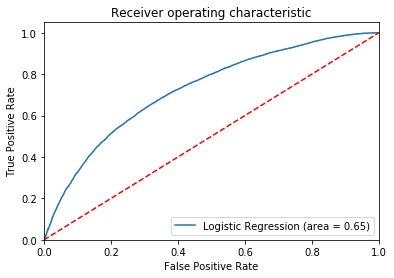

In [11]:
############################################  LOGISTIC REGRESSION MODEL ####################################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import RFE

df1 = pd.read_csv("SpotifyFeatures.csv", encoding="utf8" )

x = df1[[ 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].values
# [3 2 6 1 1 1 4 1 5 1]
X = df1[['energy', 'instrumentalness', 'liveness',  'speechiness', 'valence']].values


for i in range(len(df1['popularity'])): #if the popularity is lower than 55 (goes from 0 to 100) we will set it to 0 and 1 otherwise
    if df1.at[i,'popularity'] <= 35:
        df1.at[i,'popularity'] = "0"
    else: 
        df1.at[i,'popularity'] = "1"
        
y = df1['popularity'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

###########################  BestFeatures Extraction   ##################
# rfe = RFE(logreg, 5)
# rfe = rfe.fit(x, df1['popularity'].values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

###########################   ACCURACY   ##################
y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# ###########################   CONFUSION MATRIX   ##################
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

# ###########################   REPORT   ##################
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:

############################################  SGD MODEL ####################################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

from sklearn import datasets
from sklearn.feature_selection import RFE

df1 = pd.read_csv("SpotifyFeatures.csv", encoding="utf8" )

x = df1[[ 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].values
# we get that the best features are [ 4  5 10  8  2  6  7  1  9  3]

X = df1[[ 'acousticness','danceability', 'instrumentalness','speechiness','valence']].values

for i in range(len(df1['popularity'])): #if the popularity is lower than 55 (goes from 0 to 100) we will set it to 0 and 1 otherwise
    if df1.at[i,'popularity'] <= 35:
        df1.at[i,'popularity'] = 0
    else: 
        df1.at[i,'popularity'] = 1
        
y = df1['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

############################ Here we obtain the ranking of the most relevant features ##############
# rfe = RFE(clf, 1)
# rfe = rfe.fit(x, df1['popularity'].values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

###########################   ACCURACY   ##################
# print('Accuracy of SGD classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# ###########################   CONFUSION MATRIX   ##################
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

# ###########################   REPORT   ##################
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



              precision    recall  f1-score   support

           0       0.72      0.75      0.74     27969
           1       0.59      0.55      0.57     18082

    accuracy                           0.67     46051
   macro avg       0.66      0.65      0.65     46051
weighted avg       0.67      0.67      0.67     46051



Predicted,0,1,All
True,,,
0,21046,6923,27969
1,8142,9940,18082
All,29188,16863,46051
